In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sales=pd.read_csv('sales_transactions.csv')
                  

In [4]:
sales

,TransactionID,Date,City,CustomerID,CustomerType,Category,UnitsSold,UnitPrice,Revenue,Discount,SalesRep
0,T001,2024-01-15,Lagos,C001,New,Electronics,2,150000,300000,5000,Chuka Obasi
1,T002,2024-01-18,Abuja,C002,Returning,Appliances,1,85000,85000,0,Mary Felix
2,T003,2024-01-20,Port Harcourt,C003,New,Accessories,4,5000,20000,200,Abdul Salim
3,T004,2024-01-21,Lagos,C004,Returning,Electronics,1,160000,160000,3000,Chuka Obasi
4,T005,2024-02-01,Kano,C005,New,Appliances,2,90000,180000,4000,Mary Felix
...,...,...,...,...,...,...,...,...,...,...,...
105,T106,2024-03-05,Lagos,C046,New,Electronics,2,155000,310000,500,Abdul Salim
106,T107,2024-10-23,Port Harcourt,C061,Returning,Electronics,2,155000,310000,4000,Mary Felix
107,T108,2024-09-08,Port Harcourt,C070,New,Accessories,1,5500,5500,500,Mary Felix
108,T109,2024-02-10,Kano,C135,New,Electronics,2,150000,300000,200,Chuka Obasi


In [5]:
sales.dtypes

TransactionID    object
Date             object
City             object
CustomerID       object
CustomerType     object
Category         object
UnitsSold         int64
UnitPrice         int64
Revenue           int64
Discount          int64
SalesRep         object
dtype: object

# 1 Total Revenue Generated

In [6]:
total_revenue=sales['Revenue'].sum()
print(f" Total Revenue Generated is ₦{total_revenue:,.0f}")


 Total Revenue Generated is ₦29,521,000


In [7]:
sales

,TransactionID,Date,City,CustomerID,CustomerType,Category,UnitsSold,UnitPrice,Revenue,Discount,SalesRep
0,T001,2024-01-15,Lagos,C001,New,Electronics,2,150000,300000,5000,Chuka Obasi
1,T002,2024-01-18,Abuja,C002,Returning,Appliances,1,85000,85000,0,Mary Felix
2,T003,2024-01-20,Port Harcourt,C003,New,Accessories,4,5000,20000,200,Abdul Salim
3,T004,2024-01-21,Lagos,C004,Returning,Electronics,1,160000,160000,3000,Chuka Obasi
4,T005,2024-02-01,Kano,C005,New,Appliances,2,90000,180000,4000,Mary Felix
...,...,...,...,...,...,...,...,...,...,...,...
105,T106,2024-03-05,Lagos,C046,New,Electronics,2,155000,310000,500,Abdul Salim
106,T107,2024-10-23,Port Harcourt,C061,Returning,Electronics,2,155000,310000,4000,Mary Felix
107,T108,2024-09-08,Port Harcourt,C070,New,Accessories,1,5500,5500,500,Mary Felix
108,T109,2024-02-10,Kano,C135,New,Electronics,2,150000,300000,200,Chuka Obasi


# 2 Total Transactions Recorded

In [8]:
total_transaction= sales['TransactionID'].nunique()
print(f" Total Transactions Recorded is {total_transaction:,.0f}")

 Total Transactions Recorded is 110


In [38]:
len(sales['TransactionID'])

110

# 3 Distinct Customers that made purchases

In [9]:
distinct_customers=sales['CustomerID'].nunique()
distinct_customers

77

# 4 Total Revenue Generated From Lagos

In [10]:
Lagos_revenue=sales[sales['City']==
'Lagos']['Revenue'].sum()
print(f" Total Revenue Generated in Lagos is ₦{Lagos_revenue:,.0f}")

 Total Revenue Generated in Lagos is ₦9,285,500


In [41]:
sales.groupby('City')['Revenue'].sum().loc['Lagos']

np.int64(9285500)

# 5  Units Of Accessories Sold in Abuja

In [42]:
abuja_accessories_units = sales.groupby(['Category','City'])['UnitsSold'].count().loc['Accessories'].loc['Abuja']
print(f" Units Of Accessories Sold in Abuja is {abuja_accessories_units:,.0f}")

 Units Of Accessories Sold in Abuja is 7


# 6 Average Discount

In [12]:
average_discount = sales['Discount'].mean()
print(f" Average Discount is ₦ {average_discount:,.0f}")

 Average Discount is ₦ 3,248


In [36]:
sales['Date'] = pd.to_datetime(sales['Date'])

In [37]:
sales.dtypes

TransactionID            object
Date             datetime64[ns]
City                     object
CustomerID               object
CustomerType             object
Category                 object
UnitsSold                 int64
UnitPrice                 int64
Revenue                   int64
Discount                  int64
SalesRep                 object
dtype: object

# 7 Revenue For February 

In [14]:
feb_2024_revenue = sales[sales["Date"].dt.to_period("M") == "2024-02"]["Revenue"].sum()
print(f" Revenue For February is ₦{feb_2024_revenue:,.0f}")

 Revenue For February is ₦3,855,000


# 8 Month With The Highest Sales Revenue

In [15]:
monthly_revenue = sales.groupby(sales["Date"].dt.to_period("M"))["Revenue"].sum()
highest_revenue_month = monthly_revenue.idxmax()
highest_revenue_month

Period('2024-09', 'M')

# 9  Monthly Revenue Trend

In [16]:
monthly_trend = monthly_revenue.reset_index().rename(columns={"Date": "Month", "Revenue": "MonthlyRevenue"})
monthly_trend

,Month,MonthlyRevenue
0,2024-01,2943000
1,2024-02,3855000
2,2024-03,2184500
3,2024-04,1559500
4,2024-05,2484500
5,2024-06,1083000
6,2024-07,1340000
7,2024-08,552500
8,2024-09,4744500
9,2024-10,2739000


# 10 Revenue Split Between New and Returning Customers

In [17]:
 revenue_by_customer_type = sales.groupby("CustomerType")["Revenue"].sum()
revenue_by_customer_type

CustomerType
New          12027000
Returning    17494000
Name: Revenue, dtype: int64

# 11 Average Revenue Per Customer

In [18]:
 avg_revenue_per_customer = sales.groupby("CustomerID")["Revenue"].sum().mean()
avg_revenue_per_customer

np.float64(383389.6103896104)

# 12 Customers that Bought More Than Once

In [19]:
repeat_customers = sales["CustomerID"].value_counts()
customers_bought_more_than_once = (repeat_customers > 1).sum()
customers_bought_more_than_once

np.int64(23)

# 13 Product Category With The Most Revenue

In [20]:
category_revenue = sales.groupby("Category")["Revenue"].sum()
top_category = category_revenue.idxmax()
top_category

'Electronics'

# 14 Average Revenue Per Unit For Electronics

In [21]:
electronics = sales[sales["Category"] == "Electronics"]
avg_revenue_per_unit_electronics = electronics["Revenue"].sum() / electronics["UnitsSold"].sum()
avg_revenue_per_unit_electronics

np.float64(156959.0163934426)

# 15 Sales Rep That Generated The Most Revenue

In [22]:
 top_sales_rep = sales.groupby("SalesRep")["Revenue"].sum().idxmax()
top_sales_rep

'Abdul Salim'

# 16 Total Unit Sold By Each Sales Rep

In [23]:
units_by_sales_rep = sales.groupby("SalesRep")["UnitsSold"].sum()
units_by_sales_rep

SalesRep
Abdul Salim    134
Chuka Obasi    110
Mary Felix     113
Name: UnitsSold, dtype: int64

# 17 Revenue From Lagos Only If The Customer is 'New'

In [24]:
 lagos_new_revenue = sales[(sales["City"] == "Lagos") & (sales["CustomerType"] == "New")]["Revenue"].sum()
lagos_new_revenue
print(f" revenue for lagos if the customer is new ₦ {lagos_new_revenue:,.0f}")

 revenue for lagos if the customer is new ₦ 2,563,000


# 18 Total Revenue Excluding Transactions From Port Harcourt

In [25]:
not_ph=sales[sales['City'] !='Port Harcourt']
revenue_not_ph=not_ph['Revenue'].sum()
print(f"₦{revenue_not_ph:,.0f}")

₦22,559,000


# 19 Calculate Average Units Sold Per Transaction

In [26]:
avg_unit_sold=sales.groupby('TransactionID')['UnitsSold'].mean().reset_index()
avg_unit_sold

,TransactionID,UnitsSold
0,T001,2.0
1,T002,1.0
2,T003,4.0
3,T004,1.0
4,T005,2.0
...,...,...
105,T106,2.0
106,T107,2.0
107,T108,1.0
108,T109,2.0


# 20 Total Discount Value Across All Sales

In [27]:
discount_value=sales['Discount'].sum()
print(f"₦{discount_value:,.0f}")

₦357,300


# Charts

In [28]:
dark_palette = {
     "background": "#121212",  # overall background
    "axes": "#1E1E1E",        # chart area background
    "primary": "#00BFFF",    #sky blue
    "secondary": "#FFB347",  #amber
    "success": "#50C878",     # green
    "danger": "#FF4C4C",      # red
    "accent": "#50C878",     #green 
    "alert": "#FF4C4C",      #red 
    "neutral": "#C0C0C0" }    #silver 

# Total Revenue By City

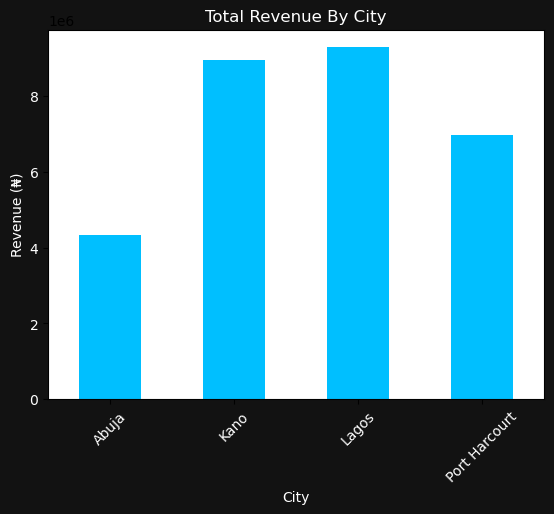

In [29]:
revenue_by_city=sales.groupby('City')['Revenue'].sum()
revenue_by_city.plot(kind='bar',color=dark_palette["primary"])
plt.title('Total Revenue By City',color="white")
plt.xlabel('City',color='white')
plt.ylabel('Revenue (₦)',color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.gcf().set_facecolor("#121212")
plt.show()

# New VS Returning Customers

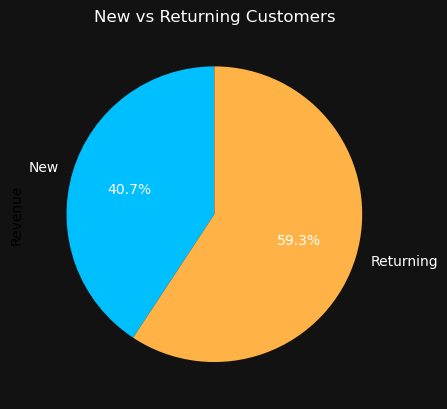

In [30]:
customer_revenue=sales.groupby('CustomerType')['Revenue'].sum()
colors = [dark_palette["primary"], dark_palette["secondary"], dark_palette["accent"], dark_palette["alert"]]
customer_revenue.plot(kind="pie", colors=colors, autopct="%.1f%%", startangle=90, textprops={"color":"white"})
plt.title("New vs Returning Customers", color="white")
plt.gcf().set_facecolor("#121212")
plt.show()


# Monthly Revenue Trend

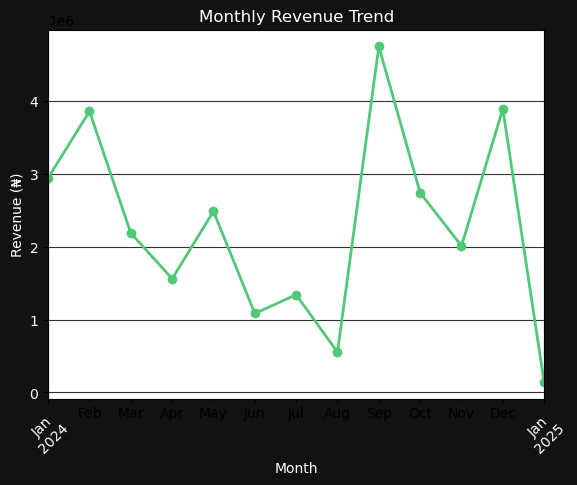

In [31]:
monthly_revenue=sales.groupby(sales['Date'].dt.to_period("M"))['Revenue'].sum()
monthly_revenue_index =monthly_revenue.index.astype(str)
monthly_revenue.plot(kind="line", marker="o", color=dark_palette["accent"], linewidth=2)
plt.title("Monthly Revenue Trend", color="white")
plt.xlabel("Month", color="white")
plt.ylabel("Revenue (₦)", color="white")
plt.xticks(color="white", rotation=45)                
plt.yticks(color="white")                             
plt.grid(True, color="#333333")                       
plt.gcf().set_facecolor("#121212")
plt.show()

# Top Product Categories By Revenue

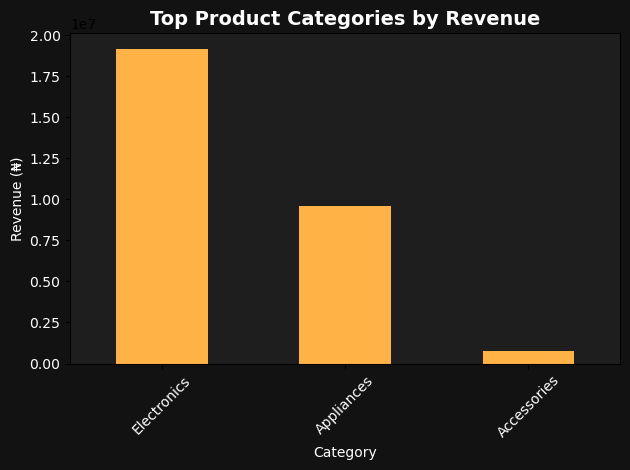

In [32]:
category_revenue=sales.groupby('Category')['Revenue'].sum().sort_values(ascending=False)
category_revenue.plot(kind="bar", color=dark_palette["secondary"])
plt.title("Top Product Categories by Revenue", color="white", fontsize=14, weight="bold")
plt.xlabel("Category", color="white")
plt.ylabel("Revenue (₦)", color="white")
plt.xticks(rotation=45, color="white")
plt.yticks(color="white")
plt.gca().set_facecolor(dark_palette["axes"])
plt.gcf().set_facecolor(dark_palette["background"])
plt.tight_layout()
plt.show()



# Sales Rep Performance

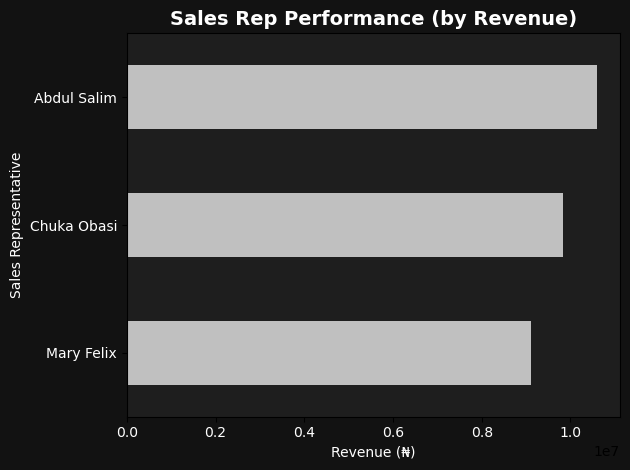

In [33]:
sales_rep_revenue=sales.groupby('SalesRep')['Revenue'].sum().sort_values(ascending=False)
sales_rep_revenue.plot(kind="barh", color=dark_palette["neutral"])
plt.title("Sales Rep Performance (by Revenue)", color="white", fontsize=14, weight="bold")
plt.xlabel("Revenue (₦)", color="white")
plt.ylabel("Sales Representative", color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().invert_yaxis()
plt.gca().set_facecolor(dark_palette["axes"])
plt.gcf().set_facecolor(dark_palette["background"])
plt.tight_layout()
plt.show()


# Average Revenue Per Customer By City

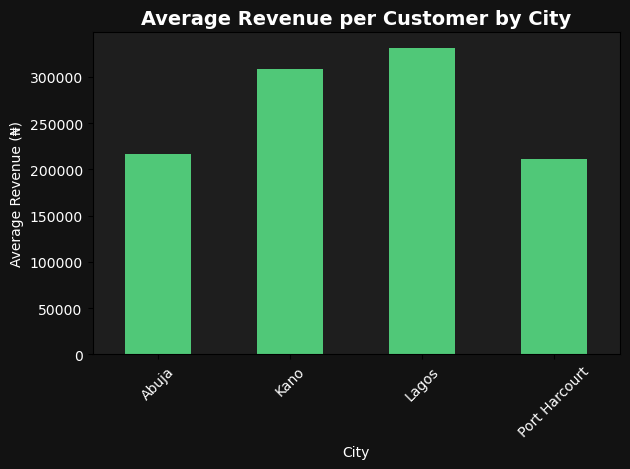

In [34]:
avg_revenue_city=sales.groupby('City')['Revenue'].mean()
avg_revenue_city.plot(kind="bar", color=dark_palette["success"])
plt.title("Average Revenue per Customer by City", color="white", fontsize=14, weight="bold")
plt.xlabel("City", color="white")
plt.ylabel("Average Revenue (₦)", color="white")
plt.xticks(rotation=45, color="white")
plt.yticks(color="white")
plt.gca().set_facecolor(dark_palette["axes"])
plt.gcf().set_facecolor(dark_palette["background"])
plt.tight_layout()
plt.show()


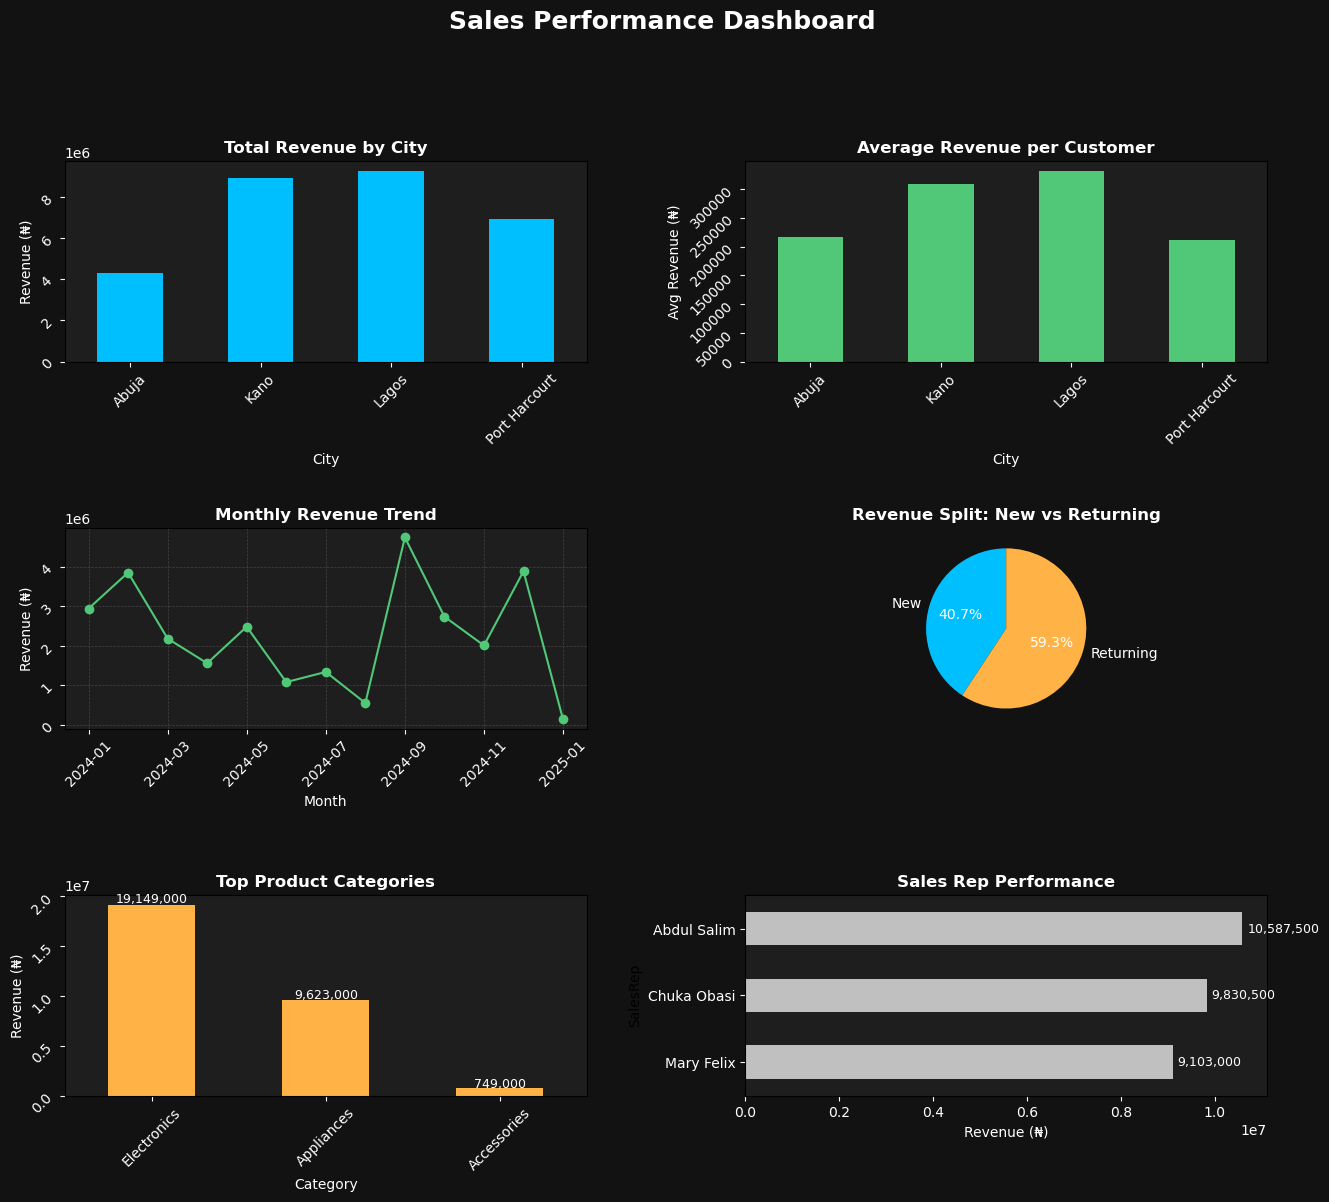

In [35]:
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.patch.set_facecolor(dark_palette["background"])  # full background
axes = axes.flatten()

# 1️⃣ Total Revenue by City
sales.groupby("City")["Revenue"].sum().plot(
    kind="bar", color=dark_palette["primary"], ax=axes[0])
axes[0].set_title("Total Revenue by City", color="white", fontsize=12, weight="bold")
axes[0].set_xlabel("City", color="white")
axes[0].set_ylabel("Revenue (₦)", color="white")
axes[0].tick_params(colors="white", rotation=45)
axes[0].set_facecolor(dark_palette["axes"])

# 2️⃣ Average Revenue per Customer by City
sales.groupby("City")["Revenue"].mean().plot(
    kind="bar", color=dark_palette["success"], ax=axes[1])
axes[1].set_title("Average Revenue per Customer", color="white", fontsize=12, weight="bold")
axes[1].set_xlabel("City", color="white")
axes[1].set_ylabel("Avg Revenue (₦)", color="white")
axes[1].tick_params(colors="white", rotation=45)
axes[1].set_facecolor(dark_palette["axes"])

# 3️⃣ Monthly Revenue Trend
monthly_revenue = sales.groupby(sales["Date"].dt.to_period("M"))["Revenue"].sum()
monthly_revenue.index = monthly_revenue.index.astype(str)
monthly_revenue.plot(kind="line", marker="o", color=dark_palette["success"], ax=axes[2])
axes[2].set_title("Monthly Revenue Trend", color="white", fontsize=12, weight="bold")
axes[2].set_xlabel("Month", color="white")
axes[2].set_ylabel("Revenue (₦)", color="white")
axes[2].tick_params(colors="white", rotation=45)
axes[2].grid(True, color="#444444", linestyle="--", linewidth=0.5)
axes[2].set_facecolor(dark_palette["axes"])

# 4️⃣ Revenue Split (Pie Chart)
customer_revenue = sales.groupby("CustomerType")["Revenue"].sum()
customer_revenue.plot(kind="pie", autopct="%.1f%%", startangle=90,
                      colors=[dark_palette["primary"], dark_palette["secondary"]],
                      textprops={"color": "white"}, ax=axes[3])
axes[3].set_title("Revenue Split: New vs Returning", color="white", fontsize=12, weight="bold")
axes[3].set_ylabel("")
axes[3].set_facecolor(dark_palette["axes"])

# 5️⃣ Top Product Categories + Value Labels
category_revenue = sales.groupby("Category")["Revenue"].sum().sort_values(ascending=False)
category_revenue.plot(kind="bar", color=dark_palette["secondary"], ax=axes[4])
axes[4].set_title("Top Product Categories", color="white", fontsize=12, weight="bold")
axes[4].set_xlabel("Category", color="white")
axes[4].set_ylabel("Revenue (₦)", color="white")
axes[4].tick_params(colors="white", rotation=45)
axes[4].set_facecolor(dark_palette["axes"])

# ✨ Add labels on top of bars
for p in axes[4].patches:
    value = p.get_height()
    axes[4].text(
        p.get_x() + p.get_width() / 2, value + (0.01 * value),
        f"{value:,.0f}", ha="center", color="white", fontsize=9
    )

# 6️⃣ Sales Rep Performance + Value Labels
rep_revenue = sales.groupby("SalesRep")["Revenue"].sum().sort_values(ascending=False)
rep_revenue.plot(kind="barh", color=dark_palette["neutral"], ax=axes[5])
axes[5].set_title("Sales Rep Performance", color="white", fontsize=12, weight="bold")
axes[5].set_xlabel("Revenue (₦)", color="white")
axes[5].tick_params(colors="white")
axes[5].invert_yaxis()
axes[5].set_facecolor(dark_palette["axes"])

# ✨ Add labels at the end of bars
for p in axes[5].patches:
    value = p.get_width()
    axes[5].text(
        value + (0.01 * value), p.get_y() + p.get_height() / 2,
        f"{value:,.0f}", va="center", color="white", fontsize=9
    )

# 🏷️ Add main dashboard title
fig.suptitle(
    "Sales Performance Dashboard",
    color="white",
    fontsize=18,
    weight="bold",
    y=1.02
)

plt.tight_layout(pad=3.0)
plt.show()
